## Imports and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import utils

In [2]:
multipleLR = np.loadtxt('Datasets/MultipleLR.csv',delimiter = ',')
X1 = multipleLR[:,:3]
y_points0 = multipleLR[:,3]

## Data Plotting Methods


In [3]:
def drawScatter(x,y,xlabel,ylabel,title):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [4]:
def drawScatter2(x,y,xlabel,ylabel,title):
    plt.plot(x,y,'-o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [5]:
def drawRegressionLine(x,y,xlabel,ylabel,title,theta0,theta1):
    drawScatter(x,y,xlabel,ylabel,title)
    plt.plot(x, theta0 + theta1*x_points ,color='red')

## Adam + MultiVariate

In [6]:
def multiLRAdam(X,y,epochs,alpha,eps,beta1,beta2,threshold):
    print(X.shape)
    thetas,m,v=np.array(np.zeros(X.shape[1]+1)),np.array(np.zeros(X.shape[1]+1)),np.array(np.zeros(X.shape[1]+1))
    thetaList , costs,hs,hbatch,vs,ms  = np.empty((1,X.shape[1]+1)),[],[],[],[v],[m]
    grads = []
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    for i in range (epochs) :
        h = np.dot(thetas,X.T)
        e = h-y
        cost =  np.sum(np.dot(e,e))/(2*X.shape[0])
        costs.append(cost)
        thetaList = np.append(thetaList,[thetas],axis =0)
        hs.append(h)
        grads = np.dot(X.T,e)/X.shape[0]    
        m = beta1 * ms[-1] + (1-beta1)*grads
        mhat = m/(1-beta1**(i+1))
        v = beta2 * vs[-1] + (1-beta2)*np.dot(grads,grads)
        vhat = v/(1-beta2**(i+1))
        thetas = thetas - (alpha*mhat)/(((vhat)+eps)**0.5)
        #print(abs(costs[i*(X.shape[0]//(batchSize-1))]-costs[-1]))
        if(i> 0 and abs(costs[-2]-costs[-1])<threshold and np.sum(abs(grads)<0.001)):
            break    
        
    thetaList = np.delete(thetaList,0,0)


    return thetaList,costs,hs

In [7]:
thetas , costs ,h = multiLRAdam(X1,y_points0,150,0.03,10**-8,0.9,0.999,1) 

(25, 3)


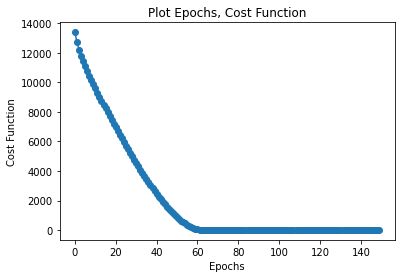

In [8]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

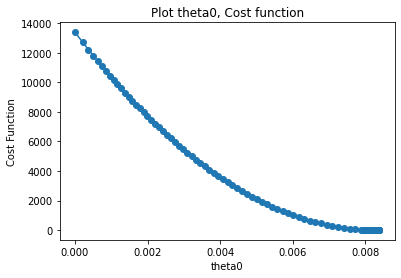

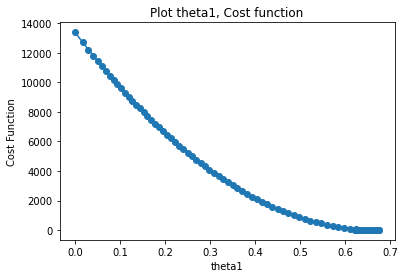

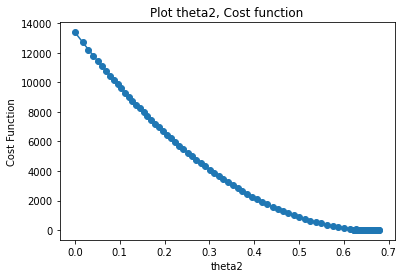

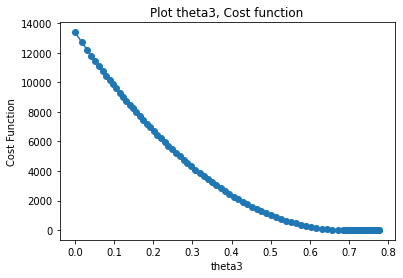

In [9]:
for i in range(X1.shape[1]+1):
    title = "Plot theta"+str(i)+", Cost function"
    drawScatter2(thetas[:,i],costs,"theta"+str(i),"Cost Function",title)
    plt.show()

In [10]:
print("r2 =",r2_score(y_points0, h[-1]))
print("cost =",costs[-1])

r2 = 0.9758468650343922
cost = 6.702475630448198


## Adam + MultiVariate + Mini Batch

In [11]:
def multiLRNminibatchAdam(X,y,batchSize,epochs,alpha,eps,beta1,beta2,threshold):
    print(X.shape)
    thetas,m,v=np.array(np.zeros(X.shape[1]+1)),np.array(np.zeros(X.shape[1]+1)),np.array(np.zeros(X.shape[1]+1))
    thetaList , costs,hs,hbatch,vs,ms  = np.empty((1,X.shape[1]+1)),[],[],[],[v],[m]
    grads = []
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    for i in range (epochs) :
        hs = []
        for j in range(0,X.shape[0],batchSize):
            end = j+batchSize
            if(end > X.shape[0]):
                end = X.shape[0]
            h = np.dot(thetas,X[j:end].T)
            e = h-y[j:end]
            cost =  np.sum(np.dot(e,e))/(2*(end-j))
            costs.append(cost)
            thetaList = np.append(thetaList,[thetas],axis =0)
            hs.append(h)
            grads = np.dot(X[j:end].T,e)/(end-j)
            
            m = beta1 * ms[-1] + (1-beta1)*grads
            mhat = m/(1-beta1**(i+1))
            v = beta2 * vs[-1] + (1-beta2)*np.dot(grads,grads)
            vhat = v/(1-beta2**(i+1))
            thetas = thetas - (alpha*mhat)/(((vhat)+eps)**0.5)
        if(i> 0 and abs(costs[i*(X.shape[0]//(batchSize))]-costs[-1])<threshold and np.sum(abs(grads)<0.001)):
            break    
        hbatch.append([ item for elem in hs for item in elem])
        
    thetaList = np.delete(thetaList,0,0)


    return thetaList,costs,hbatch

#### batch size = 10

In [12]:
thetas , costs ,h = multiLRNminibatchAdam(X1,y_points0,10,150,0.06,10**-8,0.9,0.999,0.01) 

(25, 3)


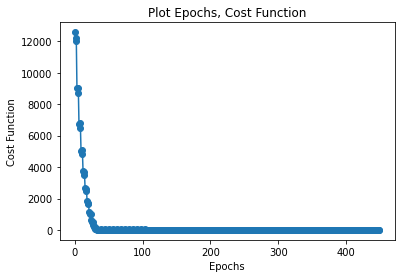

In [13]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

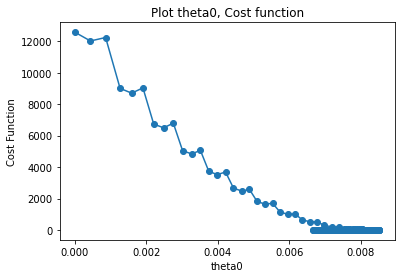

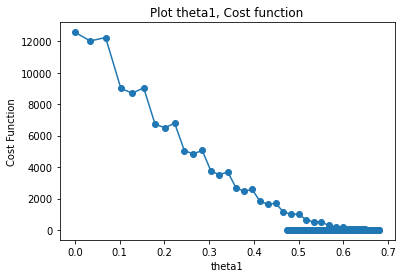

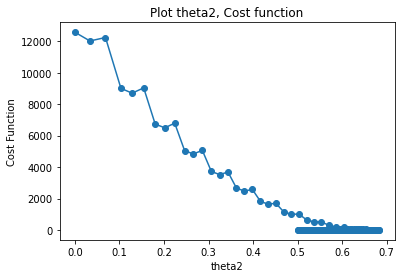

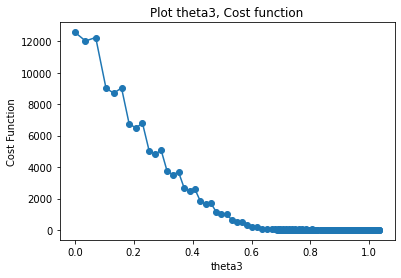

In [14]:
for i in range(X1.shape[1]+1):
    title = "Plot theta"+str(i)+", Cost function"
    drawScatter2(thetas[:,i],costs,"theta"+str(i),"Cost Function",title)
    plt.show()

In [15]:
print("r2 =",r2_score(y_points0, h[-1]))
print("cost =",costs[-1])

r2 = 0.9409166010745409
cost = 22.87457515845764


#### batch size = 8

In [16]:
thetas , costs ,h = multiLRNminibatchAdam(X1,y_points0,8,150,0.01,10**-8,0.9,0.999,0.0001) 

(25, 3)


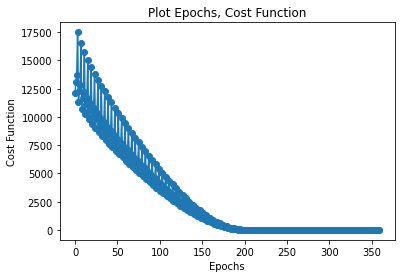

In [17]:
drawScatter2(np.arange(len(costs)),costs,"Epochs","Cost Function","Plot Epochs, Cost Function")

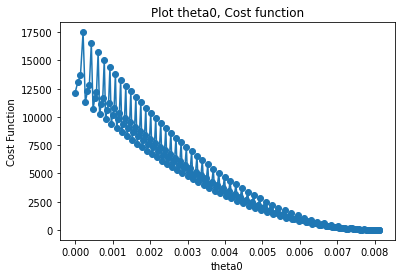

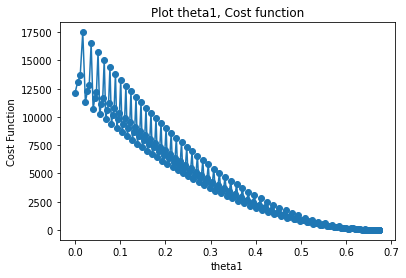

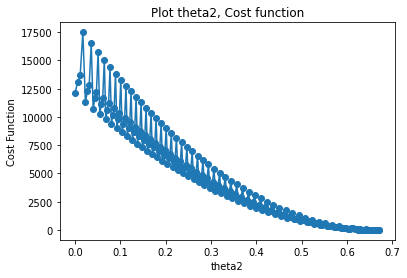

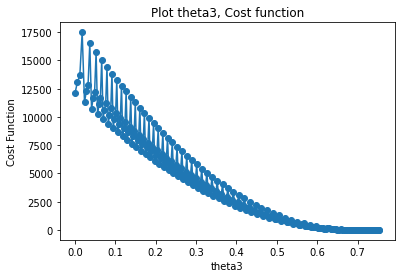

In [18]:
for i in range(X1.shape[1]+1):
    title = "Plot theta"+str(i)+", Cost function"
    drawScatter2(thetas[:,i],costs,"theta"+str(i),"Cost Function",title)
    plt.show()

In [19]:
print("r2 =",r2_score(y_points0, h[-1]))
print("cost =",costs[-1])

r2 = 0.9770797732333124
cost = 2.1060010969581238e-07
